### HW 08

### Q1

A classification decision tree is a method used to classify outcomes into different categories by making decisions at each node. Classification trees are used to assign labels or categories to data based on their attributes. A real life example would be determining whether an email is spam or not to filter an inbox. It looks at the characteristics of the incoming email (such as the sender information, specific keywords used in the email or even the email structure). 

The difference between multiple linear regression and classification decision trees is that classification decision trees split the data into subsections based on certain attributes and then make predictions on new data based on which subsection that data lies in. At each node of the classification tree, the tree must make a decision to either go down a specific path, similar to a fork in the road. This decision is made based on whether the data we're trying to predict satisfies the certain condition or not. On the other hand, multiple linear regression fits a linear equation to the data and uses predictors to predict the outcome by substituting the predictors into the equation. The coefficients of a linear regression model indicate the strength of the relationship between a variable and the outcome.



### Q2

Accuracy: the accuracy of a classification decision tree is vital when making medical diagnostics. The proportion of true positives + true negatives must be very high in this context because making an incorrect diagnostic (whether a false positive or a false negative) could lead to very dangerous consequences. For example, if a patient is diagnosed as cancer-free when they actually have cancer, they will continue living their lives normally without taking the proper medication since they're not aware that they're actually sick. On the other hand, a non-cancer patient being falsely diagnosed with cancer could also lead to the patient taking lots of drugs and treatements that would unnecessarily weaken their immune system and might even have sever side effects.

Sensitivity: the proportion of actual positives that are correctly identified must be very large in the context of banking when identifying fradulent transactions. For example, if a model is predicting if a transaction is fraudulent, it should prioritize correctly determining a fraudulent transaction. This is because if a transaction is falsely marked as fraudulent, more procedures can be taken to determine if it realy is fraudulent such as having the customer verify their identity. However, if a transaction is falsely marked as not fraudulent, the transaction will be processed normally even though it was fraudulent and will lead to financial losses for the customers.

Specificity: the proportion of actual negatives that are correctly identified is important in the context of email filtering. Assume that spam emails are positive and non-spam emails are negative. A true negative would mean that an email that is not spam is not considered spam and so is not blocked by the filtering system. A false positive would be an email that is not spam is  falsely considered spam and is blocked by the filtering system. If we have a large number of false positives, many non-spam emails are going to be blocked and so important communications will be missed. However, a false negative would be a spam email being marked as non-spam. Since the spam email can be ignored, this isn't as problematic as a non-spam email being marked as spam.

Precision: the proportion of identified positives that are actually positive should be high in the context of content moderation on online platforms. If a post is correctly identified as a hateful message and is removed, that is a true positive. If a post is falsely identified as hateful content and is falsely removed, that is a false positive. To ensure a balance between freedom of speech and maintaining a friendly environment, we will need a large number of true positives and a small number of false positives.

## Summary #1

Sure! Here's a summary of our discussion that you can use for your homework assignment:

---

### Summary of Discussion on Classification Decision Trees and Related Metrics

**Classification Decision Trees**:
- **Definition**: A classification decision tree is a machine learning algorithm used to classify data into different categories. It consists of nodes representing decisions based on attributes, branches representing outcomes, and leaf nodes representing class labels.
- **Usage**: Commonly used for tasks like spam detection, medical diagnosis, customer segmentation, and credit scoring.

**Metrics and Their Applications**:

1. **Accuracy**:
   - **Definition**: Measures the proportion of true results (both true positives and true negatives) in the population.
   - **Applications**: Email spam detection, medical diagnosis, credit scoring, fraud detection, and customer churn prediction.
   - **Rationale**: High accuracy ensures overall correct classification, which is crucial in scenarios where both false positives and false negatives have significant consequences.

2. **Sensitivity (Recall)**:
   - **Definition**: Measures the proportion of actual positives that are correctly identified.
   - **Applications**: Medical screening, fraud detection, security systems, environmental monitoring, and customer feedback analysis.
   - **Rationale**: High sensitivity is important in scenarios where missing a positive case (false negative) has severe consequences, such as in disease detection or fraud prevention.

3. **Specificity**:
   - **Definition**: Measures the proportion of actual negatives that are correctly identified.
   - **Applications**: Airport security screening, email filtering for non-spam emails.
   - **Rationale**: High specificity is prioritized to minimize false positives, ensuring that legitimate cases are not incorrectly flagged, which is important for efficiency and user experience.

4. **Precision**:
   - **Definition**: Measures the proportion of positive identifications that were actually correct.
   - **Applications**: Email spam filtering, medical testing, fraud detection, targeted advertising, and content moderation on social media platforms.
   - **Rationale**: High precision is crucial in scenarios where the cost of false positives is high, ensuring that positive identifications are accurate and minimizing unnecessary actions or disruptions.

**Examples**:
- **Prioritizing True Positives**: Cancer screening, where detecting as many true cases as possible is critical.
- **Prioritizing True Negatives**: Airport security screening, where minimizing false alarms is essential to avoid unnecessary delays.
- **Balancing Metrics**: In content moderation, balancing precision and recall to effectively remove harmful content while minimizing the removal of legitimate posts.

---

Feel free to adjust or expand on this summary based on your specific assignment requirements! If you need any more details or examples, just let me know. Good luck with your homework!

### Q3

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
ab

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight_oz
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,8.0,5.2,1.4,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,9.3,6.6,1.1,24.0
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,9.1,6.1,0.7,8.0
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,8.0,5.4,0.7,6.4
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,10.7,8.9,0.9,14.4


In [2]:
del ab['Weight_oz']
del ab['Width']
del ab['Height']

In [3]:
ab_cleaned = ab.dropna()
ab_cleaned

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,0.9


In [4]:
ab_cleaned.loc[:,'Pub year'] = ab_cleaned['Pub year'].astype(int)
ab_cleaned.loc[:,'NumPages'] = ab_cleaned['NumPages'].astype(int)
ab_cleaned.loc[:,'Hard_or_Paper'] = ab_cleaned['Hard_or_Paper'].astype('category')
ab_cleaned

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,0.9


### Q4

In [5]:
from sklearn.model_selection import train_test_split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_cleaned, test_size=0.2, random_state=42)

train_size = ab_reduced_noNaN_train.shape[0]
test_size = ab_reduced_noNaN_test.shape[0]

print(f"Number of observations in the training set: {train_size}")
print(f"Number of observations in the test set: {test_size}")

Number of observations in the training set: 255
Number of observations in the test set: 64


[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127, 11]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]\nclass = Paperback')]

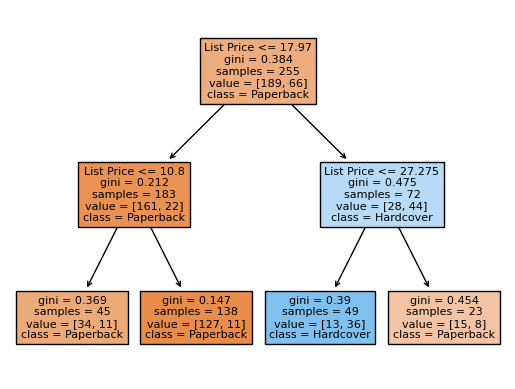

In [6]:
from sklearn.tree import DecisionTreeClassifier
y = pd.get_dummies(ab_cleaned["Hard_or_Paper"])['H']
X = ab_cleaned[['List Price']]

clf = DecisionTreeClassifier(max_depth=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)


The tree above above uses the List Price of each book to predict whether the book is hard back or paper back. It first classifies whether the price is greater than or equal to 17.97 or not. Based on that, it makes the decision on whether to go down the right branch or the left branch. This process is repeated until the final branch with the 'leaves' is reached and the final decision is made. Based on this model, if the price is less than 17.97, the book is likely to be paper back. If the book price is between 17.97 and 27.275, its likely to be hard-cover and if its greater than 27.275 then it's likely to be paperback.

### Q5

[Text(0.4342105263157895, 0.9, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paperback'),
 Text(0.21052631578947367, 0.7, 'NumPages <= 82.0\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paperback'),
 Text(0.10526315789473684, 0.5, 'Thick <= 0.25\ngini = 0.408\nsamples = 7\nvalue = [2, 5]\nclass = Hardcover'),
 Text(0.05263157894736842, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Paperback'),
 Text(0.15789473684210525, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Hardcover'),
 Text(0.3157894736842105, 0.5, 'Thick <= 1.65\ngini = 0.175\nsamples = 176\nvalue = [159, 17]\nclass = Paperback'),
 Text(0.2631578947368421, 0.3, 'Thick <= 0.55\ngini = 0.166\nsamples = 175\nvalue = [159, 16]\nclass = Paperback'),
 Text(0.21052631578947367, 0.1, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]\nclass = Paperback'),
 Text(0.3157894736842105, 0.1, 'gini = 0.199\nsamples = 143\nvalue = [127, 16]\nclass = Paperback'),
 Text(0.3684210526315789, 

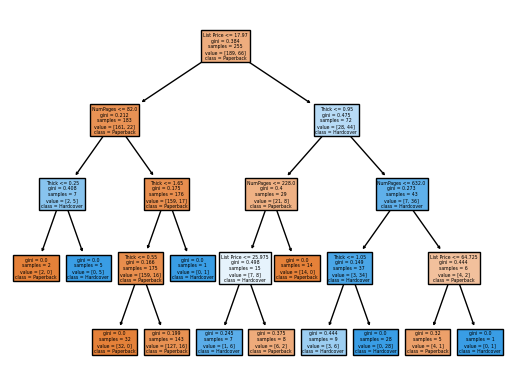

In [7]:
X_1 = ab_cleaned[['NumPages', 'Thick', 'List Price']]
clf2 = DecisionTreeClassifier(max_depth=4)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_1, y, test_size=0.2, random_state=42)
clf2.fit(X_train2, y_train2)
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'], filled=True)

### Q6

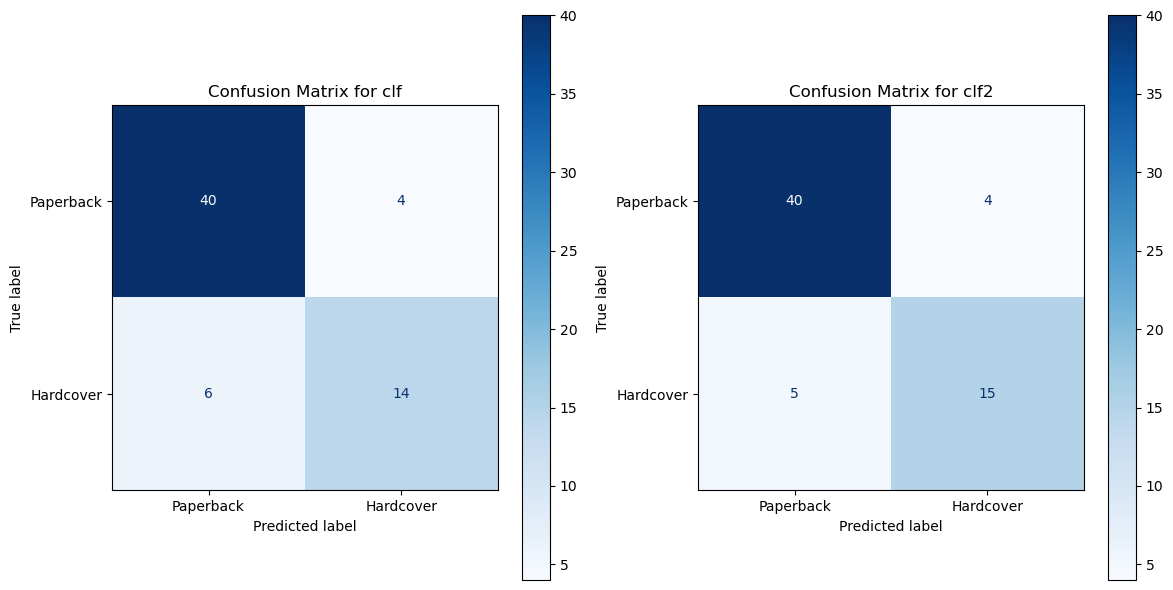

clf - Testing Accuracy: 0.84
clf - Testing Sensitivity: 0.7
clf - Testing Specificity: 0.91
clf2 - Testing Accuracy: 0.86
clf2 - Testing Sensitivity: 0.75
clf2 - Testing Specificity: 0.91


In [8]:
import matplotlib.pyplot as plt

# Predictions for clf
X_test_clf = X_test[['List Price']]  # Ensure only 'List Price' is used
y_pred_clf = clf.predict(X_test_clf)

# Predictions for clf2
X_test_clf2 = X_test2[['NumPages', 'Thick', 'List Price']]  # Ensure correct features are used
y_pred_clf2 = clf2.predict(X_test_clf2)

# Generate confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test2, y_pred_clf2)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for clf
ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paperback', 'Hardcover']).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix for clf")

# Plot for clf2
ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paperback', 'Hardcover']).plot(ax=axes[1], cmap='Blues')
axes[1].set_title("Confusion Matrix for clf2")

plt.tight_layout()
plt.show()
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Predictions for clf
y_train_pred_clf = clf.predict(X_train)
y_test_pred_clf = clf.predict(X_test)

# Predictions for clf2
y_train_pred_clf2 = clf2.predict(X_train2)
y_test_pred_clf2 = clf2.predict(X_test2)

# Metrics for clf
print("clf - Testing Accuracy:", np.round(accuracy_score(y_test, y_test_pred_clf), 2))
print("clf - Testing Sensitivity:", np.round(recall_score(y_test, y_test_pred_clf, pos_label=1),2))
print("clf - Testing Specificity:", np.round(recall_score(y_test, y_test_pred_clf, pos_label=0), 2))

# Metrics for clf2
print("clf2 - Testing Accuracy:", np.round(accuracy_score(y_test2, y_test_pred_clf2), 2))
print("clf2 - Testing Sensitivity:", np.round(recall_score(y_test2, y_test_pred_clf2, pos_label=1), 2))
print("clf2 - Testing Specificity:", np.round(recall_score(y_test2, y_test_pred_clf2, pos_label=0),2))



In the matrices above, the x-axis contains the categories predicted by the decision tree whereas the y-axis contains the actual true categories of the data. Here, a positive would be the model predicting a hard-back book whereas a negative would be predicting a paper-back. A true positive would be the model correctly predicting a hard-back book and a false positive would be the model predicting a paper-back book as hard-back. The opposite is true for true negatives and false negatives. Each quadrant of the matrix represents whether a book was predicted correctly or not. For example, the bottom left corner would be the count of books that were actually hard-back but the model incorrectly predicted them to be paper-back. When creating the confusion matrix, the true values are entered first in the `confusion_matrix` function.


### Q7

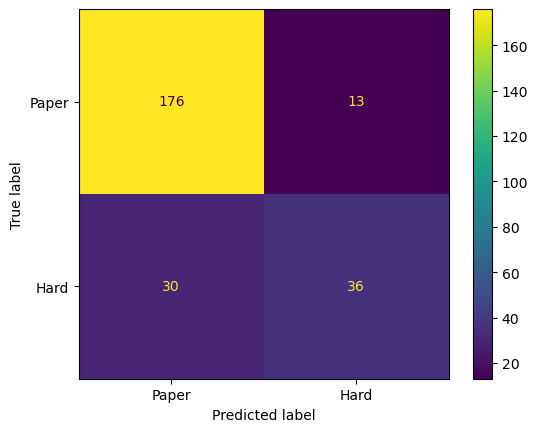

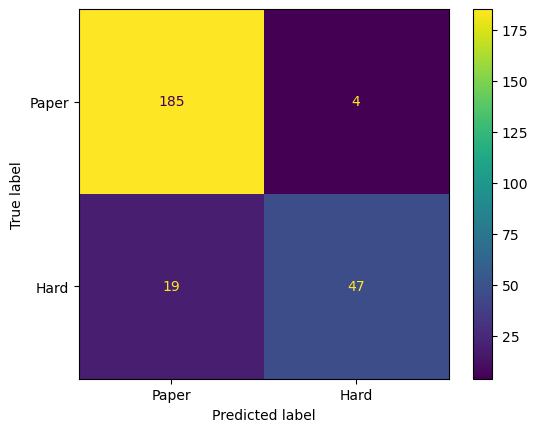

In [9]:
ConfusionMatrixDisplay(
    confusion_matrix(y_train, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(y_train, 
                     clf2.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

The two matrices above are created using the two classification trees (which were trained using the `X_train` values). Essentially, the confusion matrices above represent how well the trees were at predicting in-sample data, as opposed to the previous two classification trees which were used to predict the outcomes using out of sample data. The difference could be a result of the model being overfit meaning it predicts in-sample data better than out of sample data. Also, we split the original data into training or testing categories with an 80/20 split and so the size of the training data is larger than the size of the testing data. The original two models are better because they better represent the model's ability to predict unseen out-of-sample data rather than predicting data it was already trained on.

### Q8

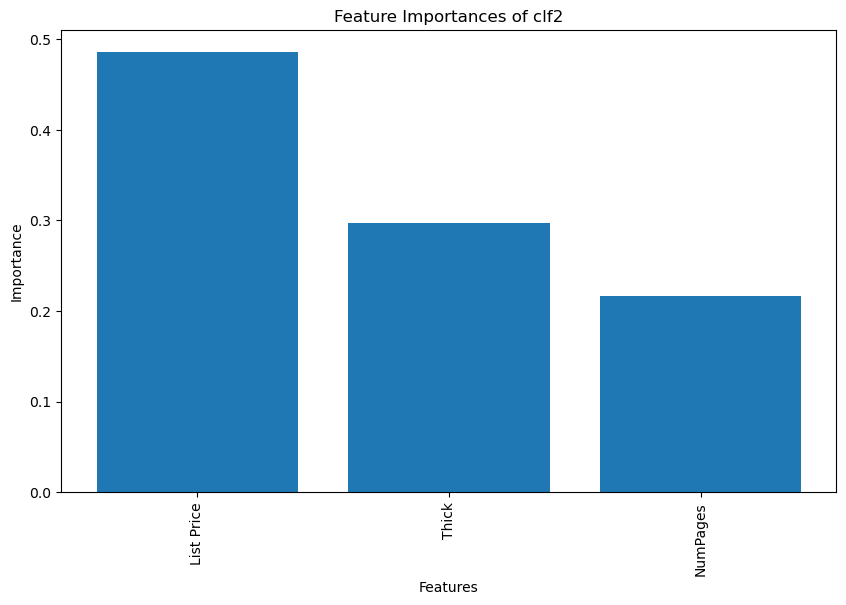

The most important predictor variable for clf2 is: List Price


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming clf2 is your trained decision tree classifier
feature_importances = clf2.feature_importances_
features = clf2.feature_names_in_

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances of clf2")
plt.bar(range(len(feature_importances)), feature_importances[indices], align='center')
plt.xticks(range(len(feature_importances)), [features[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Report the most important predictor variable
most_important_feature = features[indices[0]]
print(f"The most important predictor variable for clf2 is: {most_important_feature}")

### Q9

When interpreting coefficients of predictor variables in a linear regression model, we often examine the p-value of each coefficient by which we can determine whether the coefficients are statistically significant or not. The p-values characterize the strength against a Null Hypothesis of no linear association between a certain predictor variable and the outcome. The coefficients of each predictor also represent the change in the outcome per unit increase of the predictor, given that all other variables are kept constant (assuming continuous predictors and outcomes). However, in classification trees, the feature importances indicate how important each feature is in making each decision based on many metrics (Gini impurity or Shanon entropy). 

### Summary #2 

Here's a summary of our discussion:

1. **Confusion Matrices and Model Performance**:
   - We discussed the differences between confusion matrices for training and testing data in decision tree classifiers. The matrices for the testing data are better indicators of model performance because they reflect how well the models generalize to new, unseen data, whereas the training data matrices often show overly optimistic results due to overfitting.

2. **Visualizing Feature Importances**:
   - We visualized the feature importances of `clf2` using a bar chart. The code provided used the `feature_importances_` attribute and `feature_names_in_` to identify and display the most important predictor variable.

3. **Interpreting Coefficients vs. Feature Importances**:
   - We compared the interpretation of coefficients in linear regression models, which represent the change in the dependent variable for a one-unit change in the predictor, to feature importances in decision trees, which rank features based on their contribution to reducing impurity.

4. **Pre-processing and EDA**:
   - We pre-processed the Amazon books dataset by removing specific columns, dropping rows with NaN entries, and setting appropriate data types. We then performed initial exploratory data analysis (EDA) and data summarization.

5. **Training and Visualizing Decision Trees**:
   - We created an 80/20 train-test split and trained a `DecisionTreeClassifier` using the `List Price` feature to predict whether a book is a hard cover or paper back. We visualized the decision tree and explained how predictions are made based on the `List Price`.
   - We repeated the process using `NumPages`, `Thick`, and `List Price` as features and a `max_depth` of 4, and explained how predictions are made for the `clf2` model.

6. **Confusion Matrices for Testing Data**:
   - We created confusion matrices for `clf` and `clf2` using the testing data and reported the sensitivity, specificity, and accuracy for each model.

7. **Explanation of Differences in Confusion Matrices**:
   - We explained that the differences between confusion matrices using different features are due to the number of features used for prediction. More features generally allow the model to capture more complex patterns, potentially improving performance on the training set. However, the testing data matrices provide a more realistic assessment of model performance.

If you need further details or have additional questions, feel free to ask!

### Q10
Yes, I have reviewed the course material and I frequently use Piazza to ask questions.